In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [2]:
(train_examples, validation_examples), info = tfds.load(
    'tf_flowers', 
    with_info=True, 
    as_supervised=True, 
    split=['train[:70%]', 'train[70%:]'],
)

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

In [3]:
for i, example_image in enumerate(train_examples.take(3)):
  print("Image {} shape: {}".format(i+1, example_image[0].shape))

IMAGE_RES = 224

Image 1 shape: (333, 500, 3)
Image 2 shape: (212, 320, 3)
Image 3 shape: (240, 320, 3)


In [4]:
def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = train_examples.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [5]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

In [6]:
feature_extractor.trainable = False

In [7]:
model1 = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(5)
])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
model1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 5
history = model1.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches) 

Epoch 1/5
81/81 [==============================] - 175s 2s/step - loss: 0.7638 - accuracy: 0.7193 - val_loss: 0.4776 - val_accuracy: 0.8429
Epoch 2/5
81/81 [==============================] - 101s 1s/step - loss: 0.3819 - accuracy: 0.8688 - val_loss: 0.3841 - val_accuracy: 0.8683
Epoch 3/5
81/81 [==============================] - 99s 1s/step - loss: 0.3009 - accuracy: 0.9019 - val_loss: 0.3524 - val_accuracy: 0.8856
Epoch 4/5
81/81 [==============================] - 122s 2s/step - loss: 0.2549 - accuracy: 0.9194 - val_loss: 0.3223 - val_accuracy: 0.8928
Epoch 5/5
81/81 [==============================] - 105s 1s/step - loss: 0.2174 - accuracy: 0.9330 - val_loss: 0.3162 - val_accuracy: 0.8874


In [9]:
for i, example_image in enumerate(train_examples.take(3)):
  print("Image {} shape: {}".format(i+1, example_image[0].shape))

IMAGE_RES = 299

Image 1 shape: (333, 500, 3)
Image 2 shape: (212, 320, 3)
Image 3 shape: (240, 320, 3)


In [10]:
def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = train_examples.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [11]:
URL = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

feature_extractor.trainable = False

In [12]:
model2 = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(5)
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


In [13]:
model2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 5
history_inception_v3 = model2.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches) 

Epoch 1/5
81/81 [==============================] - 561s 7s/step - loss: 0.7351 - accuracy: 0.7435 - val_loss: 0.4554 - val_accuracy: 0.8492
Epoch 2/5
81/81 [==============================] - 582s 7s/step - loss: 0.3880 - accuracy: 0.8789 - val_loss: 0.3587 - val_accuracy: 0.8738
Epoch 3/5
81/81 [==============================] - 483s 6s/step - loss: 0.3050 - accuracy: 0.9039 - val_loss: 0.3089 - val_accuracy: 0.8992
Epoch 4/5
81/81 [==============================] - 495s 6s/step - loss: 0.2622 - accuracy: 0.9163 - val_loss: 0.2925 - val_accuracy: 0.9001
Epoch 5/5
81/81 [==============================] - 534s 7s/step - loss: 0.2257 - accuracy: 0.9311 - val_loss: 0.2749 - val_accuracy: 0.9037


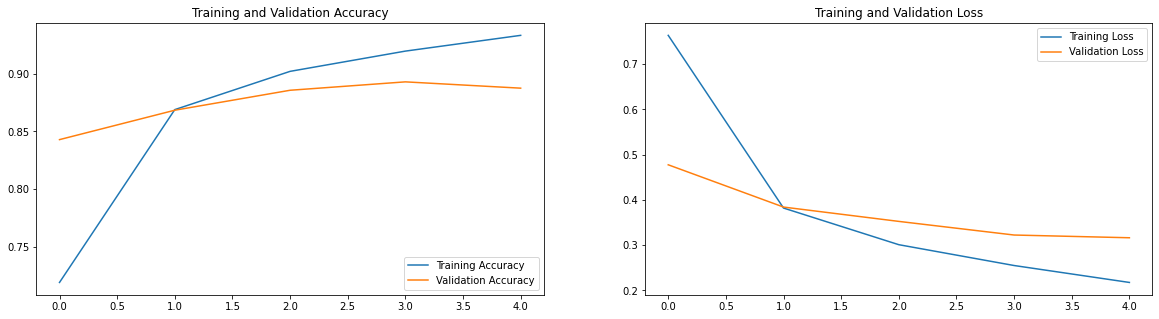

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

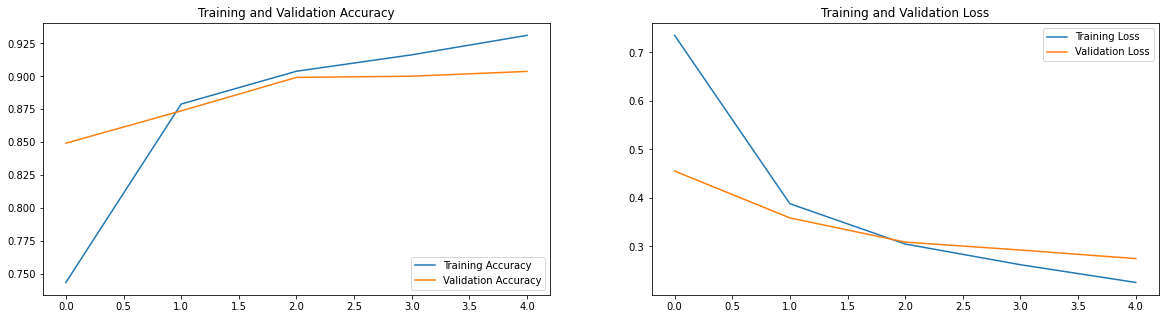

In [15]:
acc = history_inception_v3.history['accuracy']
val_acc = history_inception_v3.history['val_accuracy']

loss = history_inception_v3.history['loss']
val_loss = history_inception_v3.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

pred = model1.predict(validation_batches)
pred = tf.argmax(pred,axis=1)
true = tf.concat([y for x,y in validation_batches],axis=0)

cm=metrics.confusion_matrix(true,pred)

df_cm = pd.DataFrame(cm, index = [y for y in range(5)],
                  columns = [y for y in range(5)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
pred = model2.predict(validation_batches)
pred = tf.argmax(pred,axis=1)
true = tf.concat([y for x,y in validation_batches],axis=0)

cm=metrics.confusion_matrix(true,pred)

df_cm = pd.DataFrame(cm, index = [y for y in range(5)],
                  columns = [y for y in range(5)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)